In [1]:
import os
import torch
from tqdm import tqdm
from utils import Classification_Model, Standard_DataLoader, Trainer, load_rgb_mean_std

In [2]:
CWD = os.getcwd()
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE_NAME = torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'

print(f"CWD: {CWD}")
print(f"DEVICE: {DEVICE_NAME}")

CWD: /mnt/e/xAI-WriterIdentification/HI-EXP/classifier_NN
DEVICE: NVIDIA GeForce RTX 3060


In [3]:
MODEL_PATH = CWD + "/cp/Test_3_TL_val_best_model.pth"
TEST_ID = "VatLat653"
OUTPUT_DIR = CWD + f"/tests/output/{TEST_ID}"
SOURCE_DATA_DIR = CWD + "/../../datasets/Vat.lat.653"

if not os.path.exists(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)

# Phase 1 -> Dataset Splitting

In [4]:
os.mkdir(OUTPUT_DIR + "/train")
os.mkdir(OUTPUT_DIR + "/val")
os.mkdir(OUTPUT_DIR + "/test")

classes = os.listdir(SOURCE_DATA_DIR)
for writer_id in classes:
    os.system(f"cp -r {SOURCE_DATA_DIR}/{writer_id} {OUTPUT_DIR}/train/{writer_id}")
    os.system(f"cp -r {SOURCE_DATA_DIR}/{writer_id} {OUTPUT_DIR}/val/{writer_id}")
    os.system(f"cp -r {SOURCE_DATA_DIR}/{writer_id} {OUTPUT_DIR}/test/{writer_id}")

# Phase 2 -> System Fine-Tuning

In [5]:
num_classes = len(os.listdir(OUTPUT_DIR + "/train"))
model = Classification_Model(num_classes=num_classes, mode='frozen', cp_path=MODEL_PATH)
model = model.to(DEVICE)

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {pytorch_total_params}')

Number of trainable parameters: 32996


In [6]:
mean_, std_ = load_rgb_mean_std(f"{OUTPUT_DIR}/train")
train_ds = Standard_DataLoader(directory=f"{OUTPUT_DIR}/train", batch_size=64, weighted_sampling=True, phase='train', mean=mean_, std=std_, shuffle=True)
val_ds = Standard_DataLoader(directory=f"{OUTPUT_DIR}/val", batch_size=64, weighted_sampling=False, phase='val', mean=mean_, std=std_, shuffle=False)
tds, t_dl = train_ds.load_data()
vds, v_dl = val_ds.load_data()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 522/522 [00:34<00:00, 15.26it/s]


In [7]:
os.mkdir(f"{OUTPUT_DIR}/checkpoints")
torch.backends.cudnn.benchmark = True
trainer = Trainer(model=model, t_set=t_dl, v_set=v_dl, DEVICE=DEVICE, optim_type='adamw', lr_=0.015, 
                  model_path=OUTPUT_DIR, history_path=OUTPUT_DIR, test_ID=TEST_ID, num_epochs=100)
trainer()

Epoch 1 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:21<00:00,  2.34s/it]


train_loss: 0.9041875959356169 - train_accuracy: 0.685823754789272



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 5.452187485165066 - val_accuracy: 0.11302681992337164

Epoch 2 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.49143927010539845 - train_accuracy: 0.8639846743295019



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 1.476103766671457 - val_accuracy: 0.5076628352490421

Epoch 3 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.28495694342929284 - train_accuracy: 0.9252873563218391



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 2.3226217484222973 - val_accuracy: 0.48659003831417624

Epoch 4 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.2757104564158396 - train_accuracy: 0.896551724137931



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 0.691565745834875 - val_accuracy: 0.7835249042145593

Epoch 5 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.28928409853657544 - train_accuracy: 0.8984674329501916



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 2.283093579184849 - val_accuracy: 0.5325670498084292

Epoch 6 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.1849370219698354 - train_accuracy: 0.9348659003831418



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 5.969216006012255 - val_accuracy: 0.1206896551724138

Epoch 7 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.24521968476617018 - train_accuracy: 0.9176245210727969



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 3.3025960153775196 - val_accuracy: 0.4885057471264368

Epoch 8 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.16948836630788341 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 11.423202965908123 - val_accuracy: 0.1111111111111111

Epoch 9 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.22430712555560114 - train_accuracy: 0.9252873563218391



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 5.146099921615645 - val_accuracy: 0.28160919540229884

Epoch 10 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.2750015095504308 - train_accuracy: 0.9080459770114943



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 4.235303657764562 - val_accuracy: 0.38697318007662834

Epoch 11 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.23847413873763834 - train_accuracy: 0.9310344827586207



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 2.3429583427505176 - val_accuracy: 0.4885057471264368

Epoch 12 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.23365187941839868 - train_accuracy: 0.9195402298850575



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 0.6339428504122514 - val_accuracy: 0.7318007662835249

Epoch 13 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.22s/it]


train_loss: 0.2143617166184831 - train_accuracy: 0.9233716475095786



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 6.722299405898171 - val_accuracy: 0.11877394636015326

Epoch 14 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.23s/it]


train_loss: 0.2401388960094744 - train_accuracy: 0.9118773946360154



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]


val_loss: 3.4874627760489263 - val_accuracy: 0.4846743295019157

Epoch 15 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.2299446616592992 - train_accuracy: 0.9118773946360154



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.08it/s]


val_loss: 5.2746139492000355 - val_accuracy: 0.43103448275862066

Epoch 16 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.1994047320208787 - train_accuracy: 0.9367816091954023



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 3.490449196077398 - val_accuracy: 0.18199233716475097

Epoch 17 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.24928690829953015 - train_accuracy: 0.9252873563218391



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 10.493570777191513 - val_accuracy: 0.11302681992337164

Epoch 18 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.16978390372119187 - train_accuracy: 0.9386973180076629



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 3.0581880915496082 - val_accuracy: 0.5268199233716475

Epoch 19 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.2641264139692445 - train_accuracy: 0.9137931034482759



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 2.882722219288121 - val_accuracy: 0.25862068965517243

Epoch 20 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.20917692083965317 - train_accuracy: 0.921455938697318



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 3.8168470514688457 - val_accuracy: 0.30268199233716475

Epoch 21 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.16400342997006528 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 3.433644664728434 - val_accuracy: 0.42337164750957856

Epoch 22 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.20174010868730216 - train_accuracy: 0.9310344827586207



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 4.335618666077026 - val_accuracy: 0.3850574712643678

Epoch 23 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.24746623989265998 - train_accuracy: 0.9022988505747126



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 7.349453863969708 - val_accuracy: 0.1111111111111111

Epoch 24 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.20357726979643906 - train_accuracy: 0.9252873563218391



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 2.005952728548269 - val_accuracy: 0.4003831417624521

Epoch 25 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.21406209468841553 - train_accuracy: 0.9386973180076629



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.07it/s]


val_loss: 2.8473990270546796 - val_accuracy: 0.5172413793103449

Epoch 26 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.18698349349571827 - train_accuracy: 0.9310344827586207



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 2.099559170304587 - val_accuracy: 0.37547892720306514

Epoch 27 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.18165027758399188 - train_accuracy: 0.9367816091954023



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]


val_loss: 6.634671799510261 - val_accuracy: 0.4885057471264368

Epoch 28 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.13s/it]


train_loss: 0.16504322785984055 - train_accuracy: 0.9482758620689655



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 5.913886040784561 - val_accuracy: 0.5

Epoch 29 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.14s/it]


train_loss: 0.20750676095485687 - train_accuracy: 0.921455938697318



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 3.73639598415301 - val_accuracy: 0.48084291187739464

Epoch 30 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.1568777830664682 - train_accuracy: 0.9482758620689655



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 2.8962511372292177 - val_accuracy: 0.4061302681992337

Epoch 31 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.22730297406857042 - train_accuracy: 0.9080459770114943



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 4.939017713304531 - val_accuracy: 0.5268199233716475

Epoch 32 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.17640532330534925 - train_accuracy: 0.9386973180076629



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 3.448076482588814 - val_accuracy: 0.4827586206896552

Epoch 33 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.14s/it]


train_loss: 0.20539588900818223 - train_accuracy: 0.9367816091954023



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 6.309796935411248 - val_accuracy: 0.3544061302681992

Epoch 34 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.20863728938888315 - train_accuracy: 0.9329501915708812



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.08it/s]


val_loss: 0.7142265679107772 - val_accuracy: 0.7586206896551724

Epoch 35 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.1849633866343005 - train_accuracy: 0.9425287356321839



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.10it/s]


val_loss: 2.6167528720651094 - val_accuracy: 0.3448275862068966

Epoch 36 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.14s/it]


train_loss: 0.16764973840494266 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 8.694334800215973 - val_accuracy: 0.15517241379310345

Epoch 37 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.22865320325354507 - train_accuracy: 0.921455938697318



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.09it/s]


val_loss: 3.4757530900255653 - val_accuracy: 0.5134099616858238

Epoch 38 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.13s/it]


train_loss: 0.19073103488176718 - train_accuracy: 0.9406130268199234



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.08it/s]


val_loss: 4.35006611658162 - val_accuracy: 0.42337164750957856

Epoch 39 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.19545055006655696 - train_accuracy: 0.9348659003831418



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 5.815549176877396 - val_accuracy: 0.421455938697318

Epoch 40 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.1964022842917406 - train_accuracy: 0.9291187739463601



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.07it/s]


val_loss: 5.938559374133289 - val_accuracy: 0.1111111111111111

Epoch 41 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.1465711594769781 - train_accuracy: 0.9425287356321839



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 2.150479754971847 - val_accuracy: 0.5421455938697318

Epoch 42 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.16403105192714268 - train_accuracy: 0.9386973180076629



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.07it/s]


val_loss: 2.0399130131227277 - val_accuracy: 0.4444444444444444

Epoch 43 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.13890228103632216 - train_accuracy: 0.9597701149425287



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 2.5555079302133215 - val_accuracy: 0.5153256704980843

Epoch 44 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.1330061915733805 - train_accuracy: 0.9540229885057471



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 2.802195888589818 - val_accuracy: 0.5727969348659003

Epoch 45 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.16016970580565063 - train_accuracy: 0.9425287356321839



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.07it/s]


val_loss: 2.1256126557531236 - val_accuracy: 0.49233716475095785

Epoch 46 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.14220862575874474 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.07it/s]


val_loss: 11.720383502514427 - val_accuracy: 0.1111111111111111

Epoch 47 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.14515105861870722 - train_accuracy: 0.9406130268199234



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 4.5253443726591795 - val_accuracy: 0.5114942528735632

Epoch 48 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.17427430927068338 - train_accuracy: 0.9367816091954023



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 3.8404385581997724 - val_accuracy: 0.4329501915708812

Epoch 49 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.17709178169225825 - train_accuracy: 0.9348659003831418



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 4.870289845751557 - val_accuracy: 0.48084291187739464

Epoch 50 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.13924968516689606 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 4.9776718999148555 - val_accuracy: 0.5153256704980843

Epoch 51 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.1635885043390866 - train_accuracy: 0.9444444444444444



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 1.7992634395578113 - val_accuracy: 0.632183908045977

Epoch 52 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.23s/it]


train_loss: 0.20582686827100558 - train_accuracy: 0.921455938697318



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 3.228727413776734 - val_accuracy: 0.38122605363984674

Epoch 53 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.13547957117644308 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 9.388321237488725 - val_accuracy: 0.36590038314176243

Epoch 54 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.13645142670792182 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 7.192562426643214 - val_accuracy: 0.421455938697318

Epoch 55 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.1313285112837722 - train_accuracy: 0.9559386973180076



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]


val_loss: 1.8938377809450315 - val_accuracy: 0.6149425287356322

Epoch 56 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.24s/it]


train_loss: 0.1460934132908496 - train_accuracy: 0.9616858237547893



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 7.220086796530362 - val_accuracy: 0.11302681992337164

Epoch 57 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.16821430069733398 - train_accuracy: 0.9348659003831418



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.00s/it]


val_loss: 2.6192324158177027 - val_accuracy: 0.42911877394636017

Epoch 58 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.18950455655768456 - train_accuracy: 0.9521072796934866



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 6.421580257298949 - val_accuracy: 0.421455938697318

Epoch 59 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.1476925170170393 - train_accuracy: 0.9578544061302682



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 4.709334121353325 - val_accuracy: 0.1417624521072797

Epoch 60 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.13180470733521543 - train_accuracy: 0.9444444444444444



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 1.8925104225732357 - val_accuracy: 0.49616858237547895

Epoch 61 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.22s/it]


train_loss: 0.14042093847446516 - train_accuracy: 0.9559386973180076



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 3.449471166079072 - val_accuracy: 0.33524904214559387

Epoch 62 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.1747178730494218 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 8.186813758250855 - val_accuracy: 0.1111111111111111

Epoch 63 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.17620349900932605 - train_accuracy: 0.9482758620689655



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 2.6118152260716103 - val_accuracy: 0.5363984674329502

Epoch 64 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.16731057073421404 - train_accuracy: 0.9425287356321839



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]


val_loss: 4.927800335474865 - val_accuracy: 0.5019157088122606

Epoch 65 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.15414914111981445 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 3.8322519989991095 - val_accuracy: 0.4540229885057471

Epoch 66 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.16040996024634874 - train_accuracy: 0.9348659003831418



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 7.476605619964015 - val_accuracy: 0.11685823754789272

Epoch 67 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.14s/it]


train_loss: 0.13239698757157015 - train_accuracy: 0.9597701149425287



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 2.7152264504283097 - val_accuracy: 0.5038314176245211

Epoch 68 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.22s/it]


train_loss: 0.2009863237711205 - train_accuracy: 0.9252873563218391



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 3.081144842316793 - val_accuracy: 0.4559386973180077

Epoch 69 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.15900861463327517 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 4.152854980086018 - val_accuracy: 0.4329501915708812

Epoch 70 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.13693406498523508 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]


val_loss: 2.8014731419246406 - val_accuracy: 0.4578544061302682

Epoch 71 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.15454495375640548 - train_accuracy: 0.9521072796934866



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 1.9850130272722335 - val_accuracy: 0.5383141762452107

Epoch 72 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.1093014367852517 - train_accuracy: 0.9731800766283525



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 4.942151097959028 - val_accuracy: 0.14942528735632185

Epoch 73 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.1327128441169344 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.01s/it]


val_loss: 3.801846471008527 - val_accuracy: 0.5210727969348659

Epoch 74 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.19s/it]


train_loss: 0.10139745456733923 - train_accuracy: 0.9712643678160919



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 4.806280076607512 - val_accuracy: 0.48659003831417624

Epoch 75 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.13571099234723497 - train_accuracy: 0.9616858237547893



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 7.016963793742702 - val_accuracy: 0.35823754789272033

Epoch 76 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.14612428599904323 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 5.244213090089089 - val_accuracy: 0.25287356321839083

Epoch 77 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.15413607440003946 - train_accuracy: 0.9482758620689655



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 5.473073722701876 - val_accuracy: 0.3831417624521073

Epoch 78 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.17901489972154755 - train_accuracy: 0.9444444444444444



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 2.5024774019745575 - val_accuracy: 0.3160919540229885

Epoch 79 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.16901462699261663 - train_accuracy: 0.9367816091954023



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 1.5573559163630695 - val_accuracy: 0.3314176245210728

Epoch 80 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.15359414999740792 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 3.956182002318734 - val_accuracy: 0.421455938697318

Epoch 81 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.20039692503967504 - train_accuracy: 0.9444444444444444



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 4.509406199099824 - val_accuracy: 0.5210727969348659

Epoch 82 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.1324510597177849 - train_accuracy: 0.9559386973180076



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 10.850697268928148 - val_accuracy: 0.1111111111111111

Epoch 83 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.2203149979941233 - train_accuracy: 0.9291187739463601



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 5.235626099438503 - val_accuracy: 0.3160919540229885

Epoch 84 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.17302956434958738 - train_accuracy: 0.9367816091954023



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 2.3831877685044947 - val_accuracy: 0.5651340996168582

Epoch 85 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.1670574182751535 - train_accuracy: 0.946360153256705



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 2.8794634019481884 - val_accuracy: 0.48659003831417624

Epoch 86 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.15767737823427866 - train_accuracy: 0.9501915708812261



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.06it/s]


val_loss: 3.1269925299626453 - val_accuracy: 0.5019157088122606

Epoch 87 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.17591836533983776 - train_accuracy: 0.9425287356321839



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.07it/s]


val_loss: 3.510528728485436 - val_accuracy: 0.5191570881226054

Epoch 88 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.13249867340956611 - train_accuracy: 0.9559386973180076



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.01it/s]


val_loss: 4.351157065780684 - val_accuracy: 0.3544061302681992

Epoch 89 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.11649607515883172 - train_accuracy: 0.9597701149425287



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 5.190079931440938 - val_accuracy: 0.4042145593869732

Epoch 90 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.22s/it]


train_loss: 0.11551063624835106 - train_accuracy: 0.9616858237547893



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 3.2386191493164307 - val_accuracy: 0.5478927203065134

Epoch 91 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.15701319871049274 - train_accuracy: 0.9521072796934866



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.03it/s]


val_loss: 1.7597279331407785 - val_accuracy: 0.657088122605364

Epoch 92 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.13915068168064643 - train_accuracy: 0.9521072796934866



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 4.629555387058478 - val_accuracy: 0.3390804597701149

Epoch 93 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.21s/it]


train_loss: 0.12815952906206649 - train_accuracy: 0.9540229885057471



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 4.482033716992857 - val_accuracy: 0.2835249042145594

Epoch 94 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.12387792851733065 - train_accuracy: 0.9540229885057471



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 4.046935098823802 - val_accuracy: 0.5268199233716475

Epoch 95 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.16s/it]


train_loss: 0.13943343598152944 - train_accuracy: 0.9597701149425287



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 2.8274353295659433 - val_accuracy: 0.5498084291187739

Epoch 96 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.15s/it]


train_loss: 0.15671307947558005 - train_accuracy: 0.9559386973180076



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


val_loss: 2.478071457238946 - val_accuracy: 0.4789272030651341

Epoch 97 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.10525689179869904 - train_accuracy: 0.9559386973180076



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 3.66112354402209 - val_accuracy: 0.4904214559386973

Epoch 98 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.17s/it]


train_loss: 0.10728177827893545 - train_accuracy: 0.9636015325670498



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]


val_loss: 3.220594146071266 - val_accuracy: 0.5134099616858238

Epoch 99 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.20s/it]


train_loss: 0.14149364446543186 - train_accuracy: 0.9578544061302682



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]


val_loss: 8.23527353094227 - val_accuracy: 0.367816091954023

Epoch 100 / 100


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.18s/it]


train_loss: 0.1583528276604254 - train_accuracy: 0.9655172413793104



Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.02it/s]

val_loss: 9.117669465543498 - val_accuracy: 0.5019157088122606



In [8]:
model

Classification_Model(
  (base_model): BaseModel(
    (enc): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d

# Phase 3 -> Print Results for Training

In [9]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [10]:
losses = {'train': [], 'val': []}
accs = {'train': [], 'val': []}

In [11]:
for loss in list(losses.keys()):
    with open(f'{OUTPUT_DIR}/Test_{TEST_ID}_MLC_{loss}_losses.pkl', 'rb') as f:
        losses[loss] = pkl.load(f)

In [12]:
with open(f'{OUTPUT_DIR}/Test_{TEST_ID}_MLC_losses.txt', 'w') as f:
    f.write('The optimal value of loss for the training set is: {:01.3f}\n'.format(np.min(losses['train'])))
    f.write('The optimal value of loss for the validation set is: {:01.3f}\n'.format(np.min(losses['val'])))
    best_epoch_train = np.where(np.array(losses['train']) == min(losses['train']))[0][0] + 1
    best_epoch = np.where(np.array(losses['val']) == min(losses['val']))[0][0] + 1
    f.write(f"Epoch corresponding to the optimal value of the training loss: {best_epoch_train}\\{len(losses['train'])}\n")
    f.write(f"Epoch corresponding to the optimal value of the validation loss: {best_epoch}\\{len(losses['val'])}\n")

In [13]:
plt.plot(losses['train'])
plt.plot(losses['val'])
plt.title('Model loss')
plt.ylabel('Loss [-]')
plt.xlabel('Epoch [-]')
plt.legend(['Training', 'Validation'], loc='best')
plt.savefig(f'{OUTPUT_DIR}/Test_{TEST_ID}_MLC_losses.png')
plt.close()

In [14]:
for acc in list(accs.keys()):
    with open(f'{OUTPUT_DIR}/Test_{TEST_ID}_MLC_{acc}_accuracy.pkl', 'rb') as f:
        accs[acc] = pkl.load(f)

In [15]:
with open(f'{OUTPUT_DIR}/Test_{TEST_ID}_MLC_accuracy.txt', 'w') as f:
    f.write('The optimal value of accuracy for the training set is: {:01.3f}\n'.format(np.max(accs['train'])))
    f.write('The optimal value of accuracy for the validation set is: {:01.3f}\n'.format(np.max(accs['val'])))
    best_epoch_train = np.where(np.array(accs['train']) == max(accs['train']))[0][0] + 1
    best_epoch = np.where(np.array(accs['val']) == max(accs['val']))[0][0] + 1
    f.write(f"Epoch corresponding to the optimal value of the training accuracy: {best_epoch_train}\\{len(accs['train'])}\n")
    f.write(f"Epoch corresponding to the optimal value of the validation accuracy: {best_epoch}\\{len(accs['val'])}\n")

In [16]:
plt.plot(accs['train'])
plt.plot(accs['val'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy [-]')
plt.xlabel('Epoch [-]')
plt.legend(['Training', 'Validation'], loc='best')
plt.savefig(f'{OUTPUT_DIR}/Test_{TEST_ID}_MLC_accuracy.png')
plt.close()  

# Phase 4 -> Testing and Reports

In [17]:
torch.cuda.empty_cache()

In [18]:
from utils import Classification_Model, Standard_DataLoader, load_rgb_mean_std, produce_classification_reports

In [19]:
cp_base = f"./cp/Test_3_TL_val_best_model.pth"
cp = f"{OUTPUT_DIR}/checkpoints/Test_{TEST_ID}_MLC_val_best_model.pth"
num_classes = len(os.listdir(OUTPUT_DIR + "/test"))

In [20]:
model = Classification_Model(num_classes=num_classes, mode='frozen', cp_path=cp_base)
model = model.to(DEVICE)
model.load_state_dict(torch.load(cp)['model_state_dict'])
model.eval()

Classification_Model(
  (base_model): BaseModel(
    (enc): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d

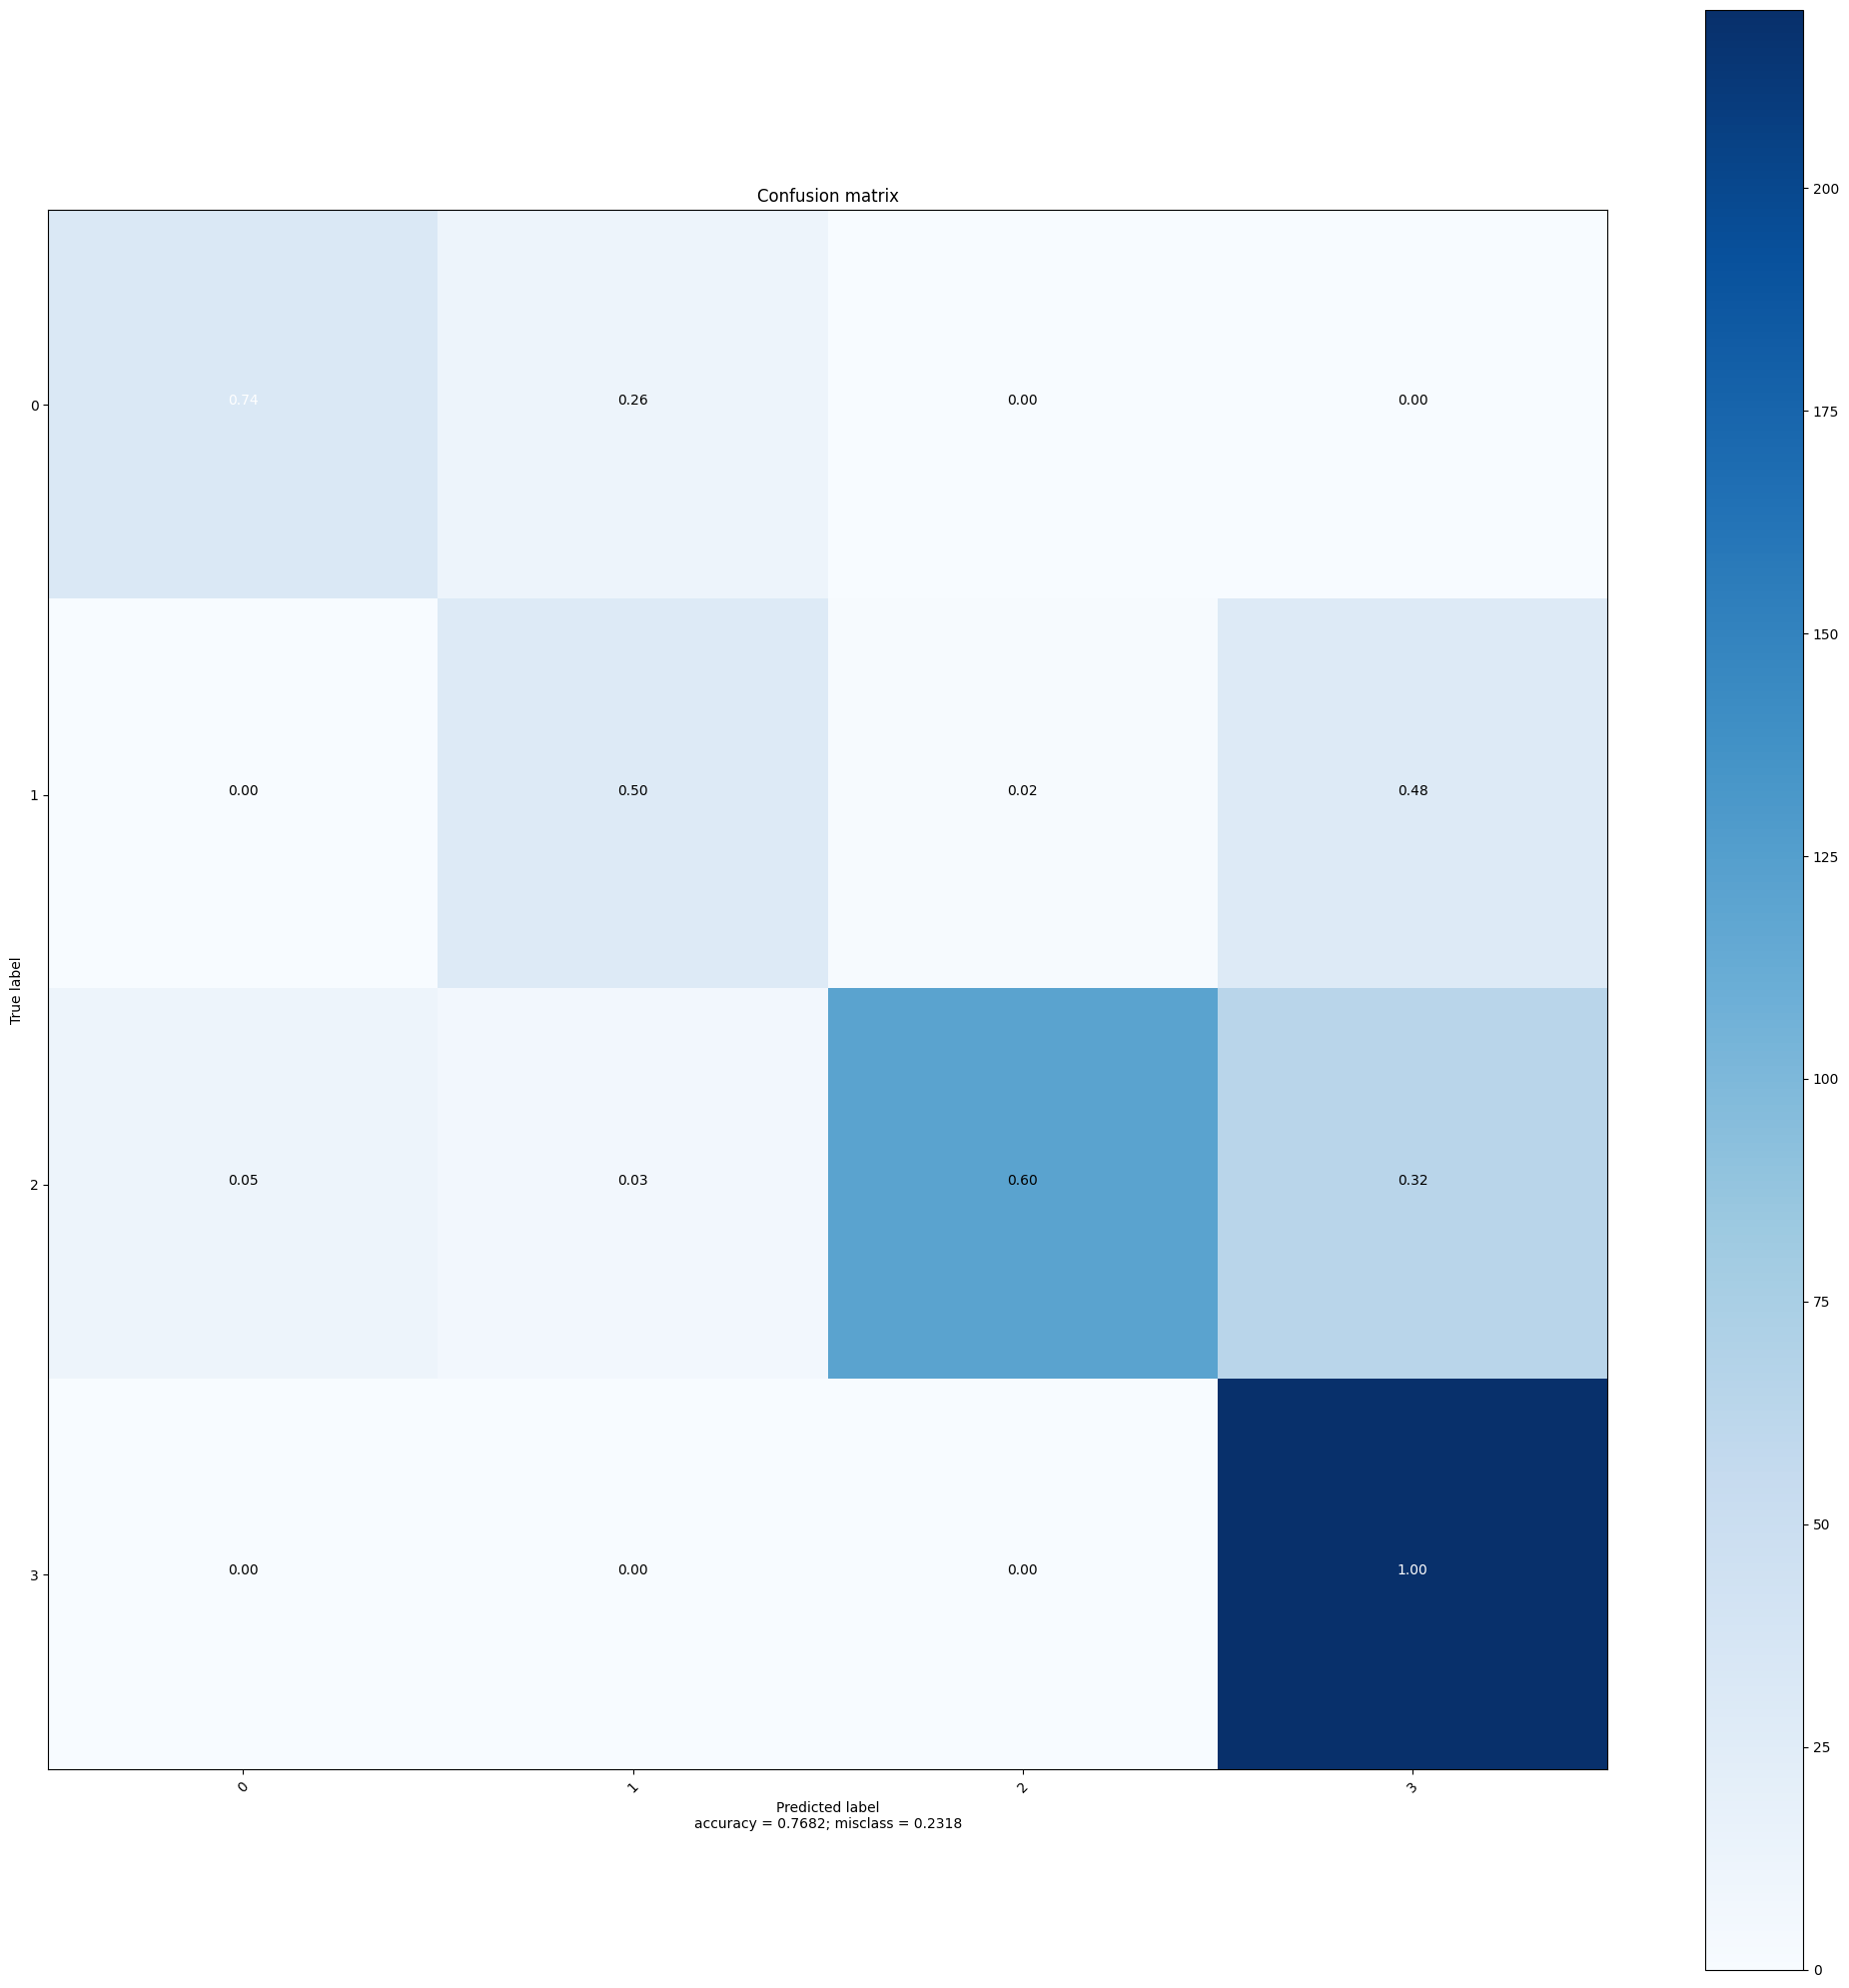

In [21]:
mean_, std_ = load_rgb_mean_std(f"{OUTPUT_DIR}/train")
dl = Standard_DataLoader(f"{OUTPUT_DIR}/test", 64, False, 'test', mean_, std_, True)
produce_classification_reports(dl, DEVICE, model, OUTPUT_DIR, TEST_ID)